In [197]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [198]:
df=pd.read_csv(r"C:\Users\dhruv\Downloads\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [200]:
df.shape

(20640, 10)

In [201]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [202]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [203]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [204]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [205]:

labelencoder=LabelEncoder()
df['ocean_proximity']=labelencoder.fit_transform(df['ocean_proximity'])

In [206]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

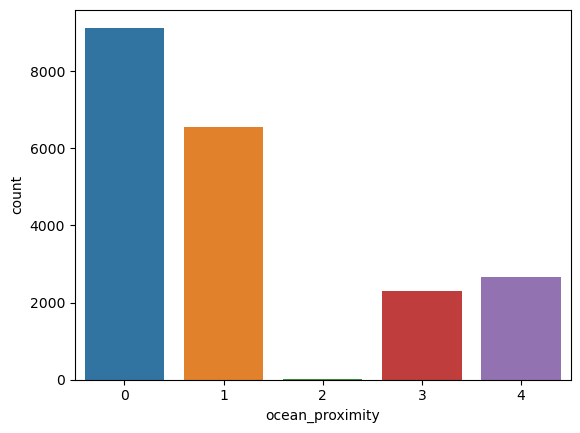

In [207]:
sns.countplot(df['ocean_proximity'])

In [208]:
df['Price']=df['median_house_value']
del df['median_house_value']

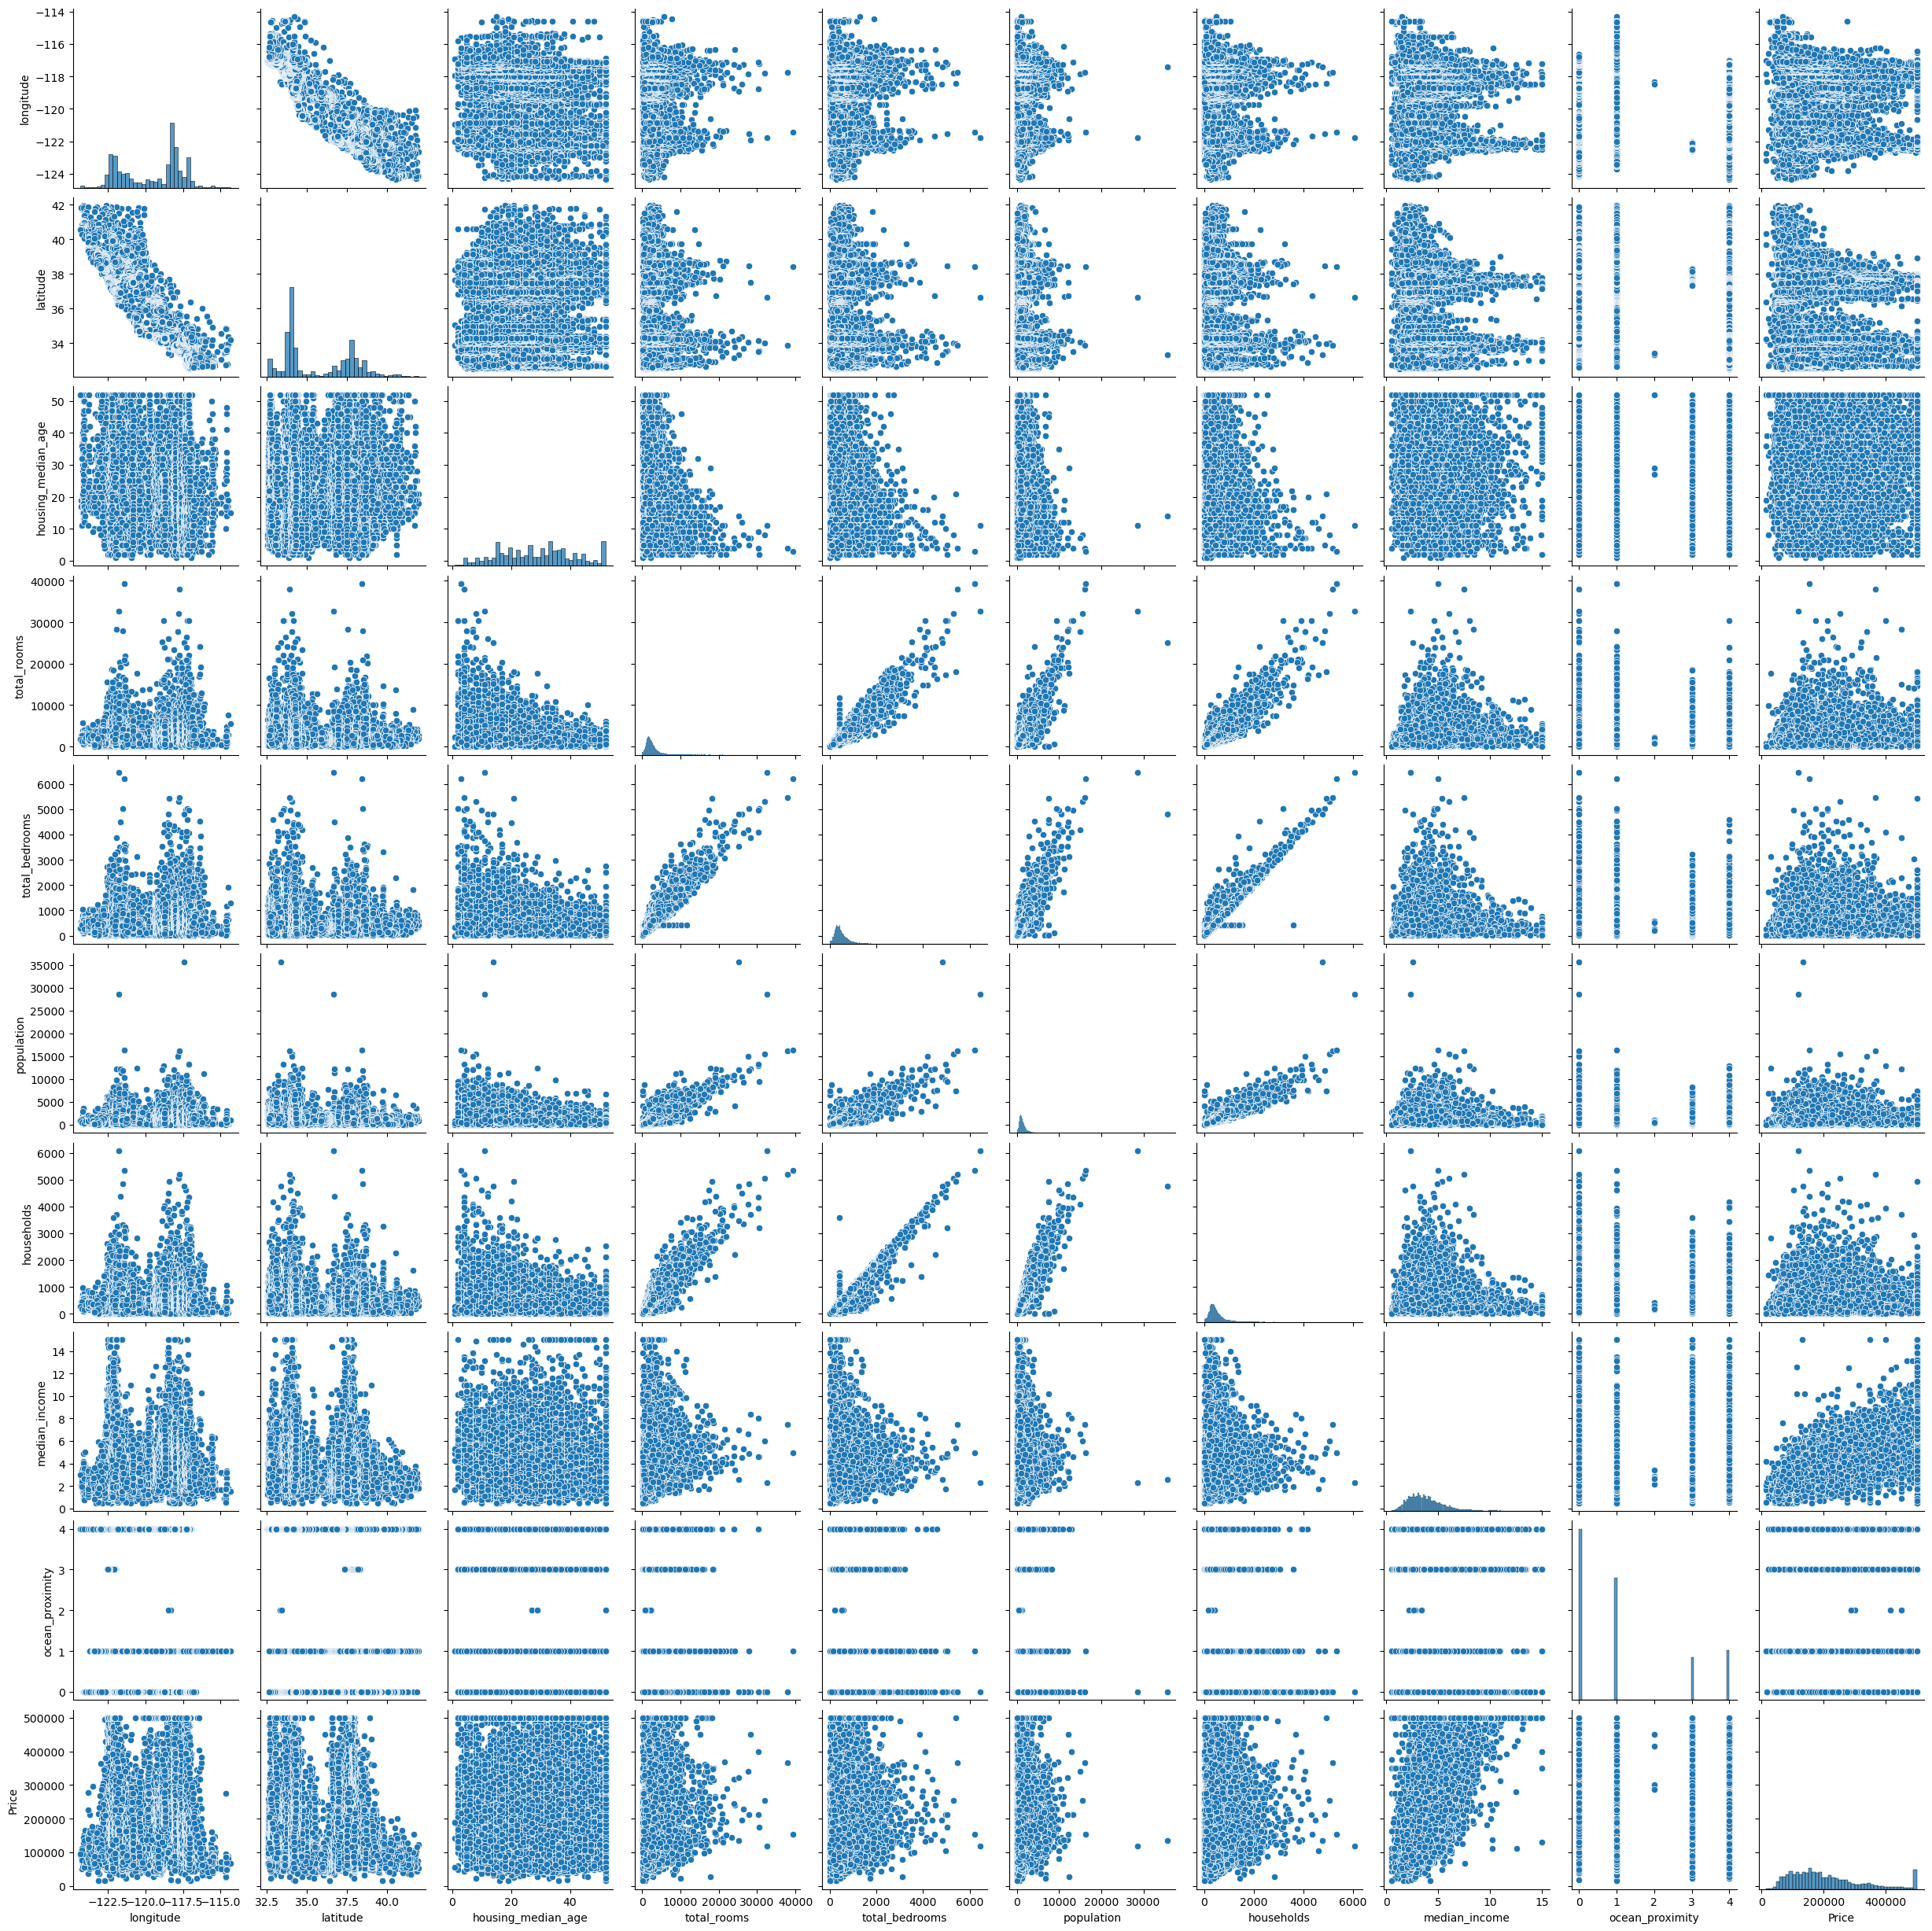

In [209]:
sns.pairplot(df)

<AxesSubplot:>

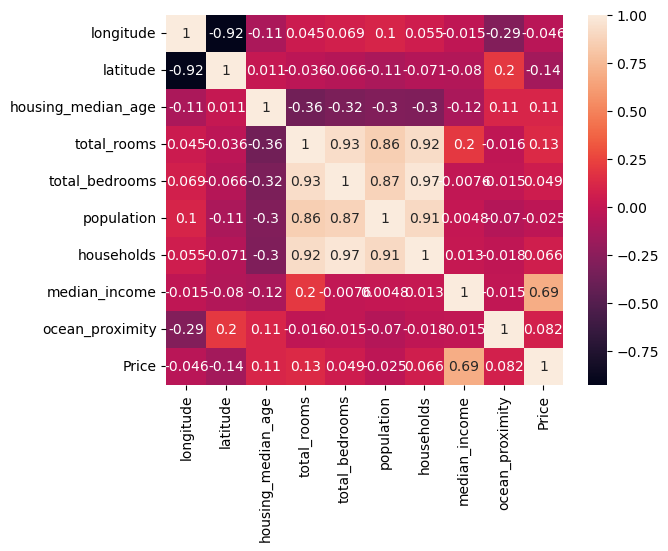

In [210]:
sns.heatmap(df.corr(),annot=True)

In [212]:

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,ocean_proximity,Price
0,-122.23,37.88,41.0,880.0,129.0,322.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,3.8462,3,342200.0


In [213]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [215]:
X_train.shape



(14448, 8)

In [216]:

X_test.shape


(6192, 8)

In [217]:

y_train.shape


(14448,)

In [218]:

y_test.shape

(6192,)

In [219]:
sc= StandardScaler()
sc.fit_transform(X_train)
sc.fit(X_test)

StandardScaler()

In [220]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [221]:
y_pred=lr.predict(X_test)
y_pred

array([ 66058.81086776, 147997.33378702, 228940.72596397, ...,
       280420.54021156, 129287.59047312, 209681.78682676])

In [222]:
mse=mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE: ",mae)
print("RMSE: ",np.sqrt(mse))

MSE:  4929996438.660421
MAE:  51314.40745169281
RMSE:  70213.9333655395


In [223]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.6243927016545261